
 ### Hackathon Project 2: Do Denoising using Autoencoder technique.
    
### This is a supervised learning problem. Data is given in data_Hac.mat format. Data contain two files, Noisy data (dataN.mat) and clean data (dataC.mat)
 

In [401]:
##Import necessary libraries keras, tensorflow, numpy and matplotlib
from sklearn.model_selection import train_test_split
import scipy.io
import numpy as np

from tensorflow.keras.models import Model
from tensorflow.keras.layers import Conv2D, MaxPooling2D, UpSampling2D, Dropout, BatchNormalization, Input, Dense, Flatten
from tensorflow.keras.callbacks import EarlyStopping
#!pip install matplotlib
import matplotlib.pyplot as plt
from tensorflow.python.layers.core import dense, Dense

## Read the .mat file

In [402]:

#Load Data
mat = scipy.io.loadmat (r'C:\Users\harit\Downloads\data_Hac.mat')
dataNoise = mat['dataN']
dataClean = mat['dataC']

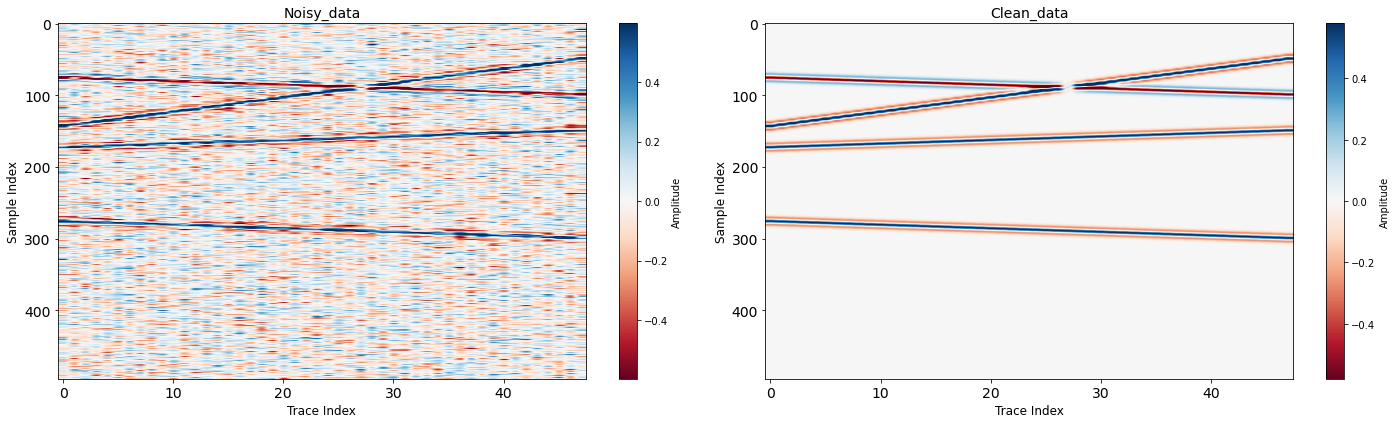

(496, 48)


In [404]:

import matplotlib.pyplot as plt
# Reshape the data arrays to 2D
Data1 = dataNoise
Data2 = dataClean

# Plot the seismic traces
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(20, 6))

# Plot Noisy data
clip_perc = 99
vm1 = np.percentile(Data1, clip_perc)
im1 = axes[0].imshow(Data1, aspect='auto', cmap='RdBu', vmin=-vm1, vmax=vm1, origin='upper')
axes[0].set_title('Noisy_data', fontsize=14)
axes[0].set_xlabel('Trace Index', fontsize=12)
axes[0].set_ylabel('Sample Index', fontsize=12)
axes[0].tick_params(axis='both', labelsize=14)
fig.colorbar(im1, ax=axes[0], label='Amplitude')

# Plot Clean data7
clip_perc = 99
vm2 = np.percentile(Data2, clip_perc)
im2 = axes[1].imshow(Data2, aspect='auto', cmap='RdBu', vmin=-vm2, vmax=vm2, origin='upper')
axes[1].set_title('Clean_data', fontsize=14)
axes[1].set_xlabel('Trace Index', fontsize=12)
axes[1].set_ylabel('Sample Index', fontsize=12)
axes[1].tick_params(axis='both', labelsize=14)
fig.colorbar(im2, ax=axes[1], label='Amplitude')

# Show the plot
plt.tight_layout()
plt.show()
print(Data1.shape)

In [406]:
# Reshape the data
Noise=dataNoise.reshape(-1,496,48,1)
Clean=dataClean.reshape(-1,496,48,1)
Clean.shape


(1, 496, 48, 1)

In [408]:
# Model
from tensorflow.keras import optimizers
def model():
    input_layer = Input(shape=(496, 48,1))  # we might define (None,None,1) here, but in model summary dims would not be visible
    
    # encoding
    x = Conv2D(64, 3, activation='relu', padding='same')(input_layer)
    x = Conv2D(32, 3, activation='relu', padding='same')(x)
    x = BatchNormalization()(x)

    x = MaxPooling2D((2, 2), padding='same')(x)
    
    x = Dropout(0.9)(x)


    # decoding
    x = Conv2D(32, 3, activation='relu', padding='same')(x)
    x = Conv2D(64, 3, activation='relu', padding='same')(x)
    x = BatchNormalization()(x)

    x = UpSampling2D((2, 2))(x)

    output_layer = Conv2D(1, 3, activation='tanh', padding='same')(x)
    model = Model(inputs=[input_layer], outputs=[output_layer])
    model.compile(optimizer=optimizers.Adam(learning_rate=0.009),loss='mean_squared_error', metrics=['accuracy'])

    return model


model = model()
model.summary()


Model: "model_37"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_43 (InputLayer)       [(None, 496, 48, 1)]      0         
                                                                 
 conv2d_196 (Conv2D)         (None, 496, 48, 64)       640       
                                                                 
 conv2d_197 (Conv2D)         (None, 496, 48, 32)       18464     
                                                                 
 batch_normalization_78 (Bat  (None, 496, 48, 32)      128       
 chNormalization)                                                
                                                                 
 max_pooling2d_41 (MaxPoolin  (None, 248, 24, 32)      0         
 g2D)                                                            
                                                                 
 dropout_40 (Dropout)        (None, 248, 24, 32)       0  

In [409]:
# model fitting to data
history = model.fit(Noise, Clean, epochs=300, batch_size=32, verbose=0 )

In [410]:
# prediction
prd=model.predict(Noise)

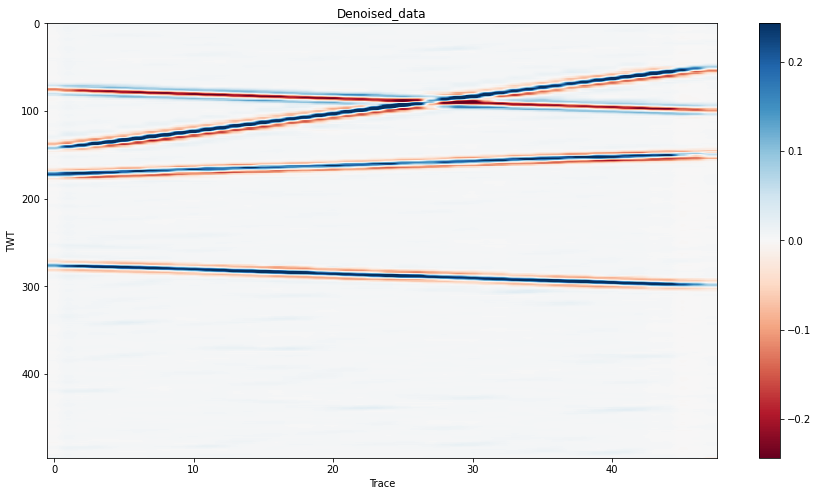

In [411]:
# plotting the prediction
prd=prd.reshape(496,48)
clip_percentile = 99
vm = np.percentile(prd, clip_percentile)
fig = plt.figure(figsize=(15, 8))
ax = fig.add_subplot(1, 1, 1)
#extent = [0,700,796, twt[0]]  # define extent
im = ax.imshow(prd,cmap='RdBu',vmin= -vm,vmax= vm, aspect='auto')
ax.set_title('Denoised_data')
ax.set_xlabel('Trace')
ax.set_ylabel('TWT')
fig.colorbar(im,ax=ax)
plt.show()

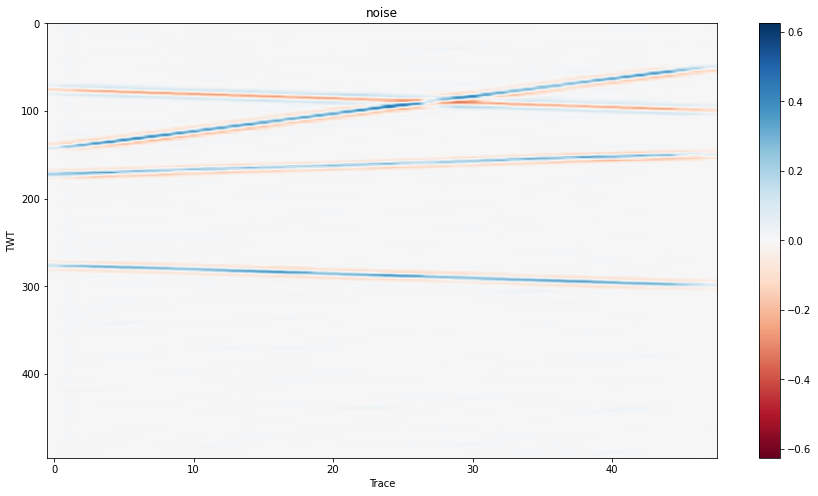

In [415]:
# plotting the noise
noise_pre=Data1-prd
clip_percentile = 99.9
vm = np.percentile(noise_pre, clip_percentile)
fig = plt.figure(figsize=(15, 8))
ax = fig.add_subplot(1, 1, 1)
#extent = [0,700,796, twt[0]]  # define extent
im = ax.imshow(prd,cmap='RdBu',vmin= -vm,vmax= vm, aspect='auto')
ax.set_title('noise')
ax.set_xlabel('Trace')
ax.set_ylabel('TWT')
fig.colorbar(im,ax=ax)
plt.show()

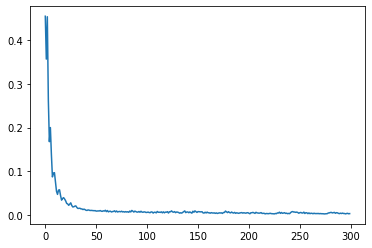

In [413]:
# plot the loss
plt.plot(history.history['loss'])
plt.show()